## Выявление определяющих факторов популярности игр в магазине Стримчик в 2016 году

#### Нам даны данные об играх за 2016 год. Исходя из них, нужно оценить значимость факторов для стратегии продаж на 2017 год. Для начала, посмотрим на входные данные и при необходимости обработаем их

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Как видим, сколько-то заметное число пропусков присутствует в столбцах year_of_release, critic_score, user_score и rating. Для начала, приведем к нижнему регистру названия столбцов, а потом обработаем пропуски 

In [5]:
df.columns = ['name', 'platform', 'release', 'genre', 'na_sales',
              'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'esrb']

### release

In [6]:
df[df['release'].isna()]

,name,platform,release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Пропусков на самом деле немного, да и не очень понятно как их заполнять. Предположу, что можно использовать какие-нибудь сторонные списки игр, где будет указан год, но сейчас у меня их в распоряжении нет, поэтому попробуем немного изловчиться и заполнить хотя бы часть

### critic_score

Боюсь, возможности заполнить пропуски в столбце особо нет - ни медиана, ни среднее тут не помогут. Придется оставить столбце как есть, разве что, поставим вместо пропуска -1 - быть может нам еще предстоит работа со столбцом, а это сильно поможет

In [10]:
df['critic_score'] = df['critic_score'].fillna(-1)

Проверим, какие вообще есть значения в столбце critic_score

In [11]:
df['critic_score'].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Выглядит как будто все в порядке, и вместо NaN теперь -1

### user_score

Вероятно, поступим так же как и со столбцом critic_score

In [12]:
df['user_score'] = df['user_score'].fillna(-1)

In [13]:
df['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

А вот тут уже что-то странное - некое значение tbd. Если верить гуглу, по факту это означает что оценки нет, она не сформирована. Для нас же это то же самое что и NaN, а значит постуим так же

In [14]:
df['user_score'] = df['user_score'].replace('tbd', -1)

### esrb

In [15]:
df['esrb'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

По тем или иным причинам, рейтинг ESRB у многих игр отсутствует. Проставить сами мы его не можем, так что опять же, укажем его отсутствие более приятным образом

In [16]:
df['esrb'] = df['esrb'].fillna('no_esrb')

### Изменение типов данных

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name            16713 non-null object
platform        16715 non-null object
release         16446 non-null float64
genre           16713 non-null object
na_sales        16715 non-null float64
eu_sales        16715 non-null float64
jp_sales        16715 non-null float64
other_sales     16715 non-null float64
critic_score    16715 non-null float64
user_score      16715 non-null object
esrb            16715 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Приведем столбец release к целочисленному типу, т.к. все что там есть это год, а столбец user_score к типу float

In [18]:
df['release'] = df['release'].astype('int', errors = 'ignore')
df['user_score'] = df['user_score'].astype('float')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name            16713 non-null object
platform        16715 non-null object
release         16446 non-null float64
genre           16713 non-null object
na_sales        16715 non-null float64
eu_sales        16715 non-null float64
jp_sales        16715 non-null float64
other_sales     16715 non-null float64
critic_score    16715 non-null float64
user_score      16715 non-null float64
esrb            16715 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Добавим столбец с суммой покупок во всех регионах

In [20]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<div class="alert alert-block alert-success">
<h2>Комментарий от ревьювера (все здОрово)</h2> 

Все верно)

### Посмотрим, сколько игр выпускалось в разные годы

In [21]:
df_years = df.groupby('release')['name'].count()

In [22]:
df_years.head()

release
1980.0     9
1981.0    46
1982.0    36
1983.0    17
1984.0    14
Name: name, dtype: int64

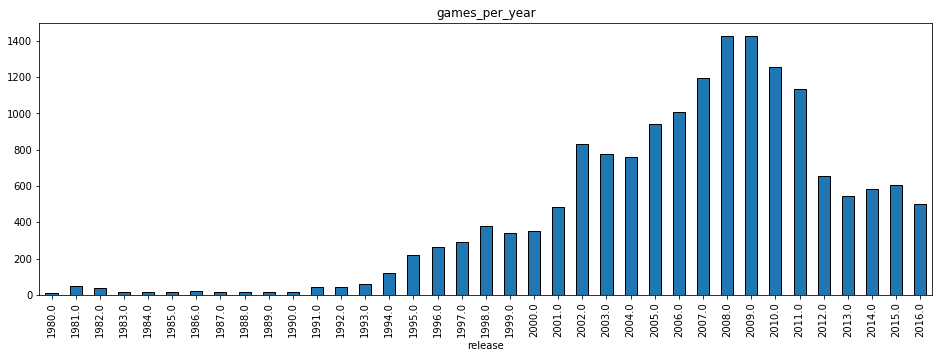

In [23]:
df_years.plot(kind = 'bar', figsize = (16, 5), ec = 'black', title = 'games_per_year');

В целом картина ожидаемая - о 2000-ых годов была лишь заря компьютерных игр и выпускалось их очень мало. Вскоре игры стали обычным бизнесом, на рынок вышли многие компании и выпускали тонны проектов, пытаясь завоевать аудиторию. Спустя несколько лет ситуация устоялась, и те компании что прошли через эту гонку стали уже делать упор на качество. График за последние годы был бы совсем другой, если бы учитывались так же инди-игры

Теперь посмотрим на количество игр на разные платформы. Для начала посмотрим, с чем имеем дело

In [24]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Выберем самые популярные платформы

In [25]:
df_platform = df.groupby('platform')['name'].count().sort_values().reset_index()

In [26]:
df_platform.columns = ['platform', 'count']

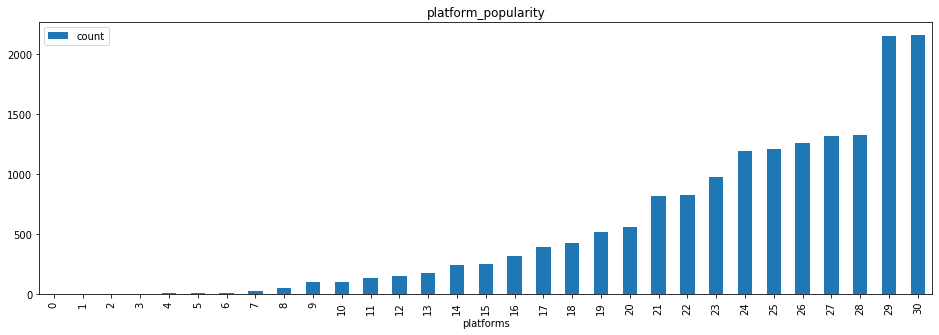

In [27]:
df_platform.plot(kind = 'bar', figsize = (16, 5), title = 'platform_popularity');
plt.xlabel('platforms');

Возьмем 10 самых популярных, после них как раз идет довольно резкий скачок вниз по популярности, и посмотрим на них внимательнее

In [28]:
df_popular_platform = df_platform.query('count > 600').reset_index()

In [29]:
df_popular_platform

,index,platform,count
0,21,GBA,822
1,22,XB,824
2,23,PC,974
3,24,PS,1197
4,25,PSP,1209
5,26,X360,1262
6,27,Wii,1320
7,28,PS3,1331
8,29,DS,2151
9,30,PS2,2161


In [30]:
platforms = df_popular_platform['platform'].values

In [31]:
df_platform_per_year = df.groupby(['platform', 'release']).count().reset_index()

In [32]:
df_platform_per_year = df_platform_per_year.query('platform in @platforms')

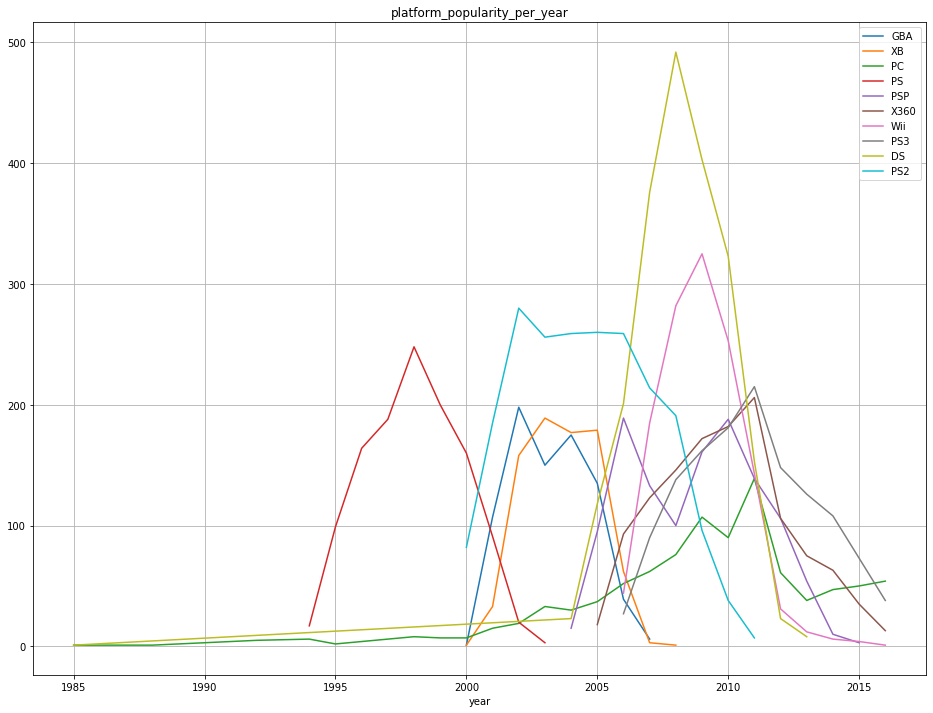

In [33]:
fig, ax = plt.subplots()
for i in platforms:
    x = df_platform_per_year.query('platform == @i')['release'].values
    y = df_platform_per_year.query('platform == @i')['name'].values
    ax.plot(x, y, label = i)
fig.set_figwidth(16)
fig.set_figheight(12)
ax.grid()
ax.legend()
ax.set_xlabel('year')
ax.set_title('platform_popularity_per_year')
plt.show()

#### Пока не слишком красиво. А давайте объединим некоторые данные, например все PS в одну категорию. В конце концов, это хорошо отразит общую популяронсть платформы. А так же уберем некоторые платформы, которые явно не могут тягаться с наиболее популярными

In [34]:
dff = df
dff['platform'] = df['platform'].replace('PS4', 'PS')
dff['platform'] = df['platform'].replace('PS3', 'PS')
dff['platform'] = df['platform'].replace('PS2', 'PS')
dff['platform'] = df['platform'].replace('XB', 'XBOX')
dff['platform'] = df['platform'].replace('X360', 'XBOX')

In [35]:
dff_platforms = ['PS', 'XBOX', 'PC', 'Wii', 'DS']

In [36]:
dff_platform_per_year = dff.groupby(['platform', 'release']).count().reset_index()

In [37]:
dff_platform_per_year = dff_platform_per_year.query('platform in @dff_platforms')

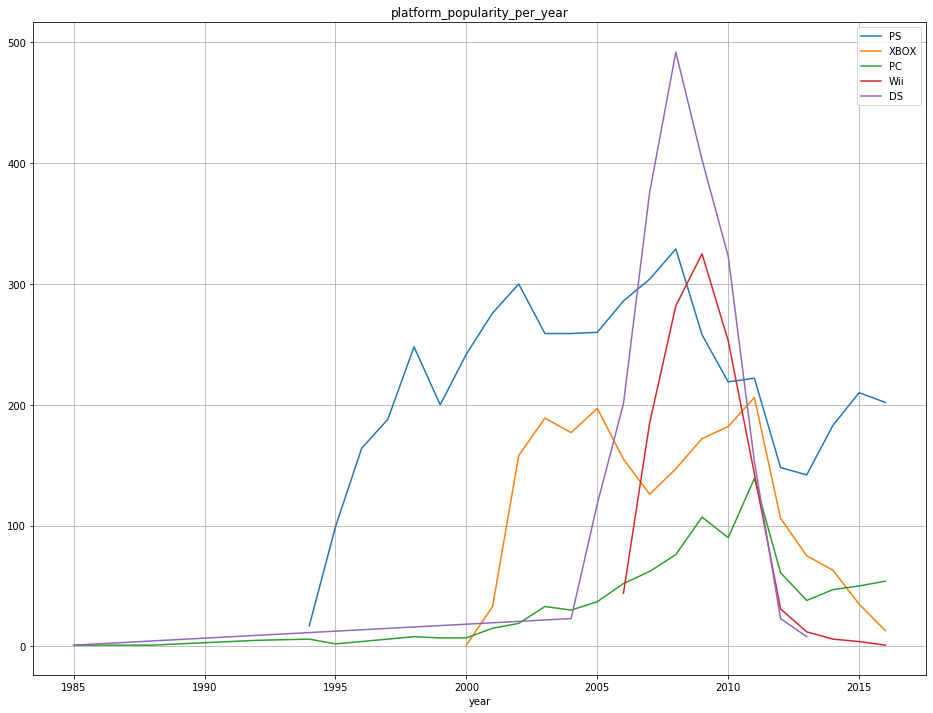

In [38]:
fig, ax = plt.subplots()
for i in dff_platforms:
    x = dff_platform_per_year.query('platform == @i')['release'].values
    y = dff_platform_per_year.query('platform == @i')['name'].values
    ax.plot(x, y, label = i)
fig.set_figwidth(16)
fig.set_figheight(12)
ax.grid()
ax.legend()
ax.set_xlabel('year')
ax.set_title('platform_popularity_per_year')
plt.show()

#### Такой график уже будет поприятнее, и наконец отражает реальное положение вещей. Wii как быстро взлетела в свое время, так же потеряла популярность, как и DS. PS держится уверенно начиная с самой первой модели, видно что популярность пришла примерно за 3 года и с тех пор держится на уровне. У XBOX похожая история, но с опозданием на 5 лет, потому и потолок тоже ниже. Кроме того, последние годы популярность пошла на спад, возможно новая модель исправит положение. PC держится довльно низко относительно приставок, с небольшим пиком в 2011-2012 годах, однако это единственная платформа которая не показала спад к концу 2016 года. Так же можно заметить - изначально было 2 платформы, далее же, начиная с PS, новые популярные и далее платформы появлялись с интервалом в примерно 5 лет. Разумеется, если посмотреть не только популярные, интервал будет гораздо меньше. Так же на рынке не появилось кого-то более менее значимого начиная с 2006 года

#### Что касается прогнозов на будущий год, для DS и Wii все довольно очевидно, их время уже ушло и вряд ли вернется. Итого осталось 3 крупных игрока, как и предполагалось - PS, XBOX и PC. Скорее всего PC как и до этого будет держаться на средненьком уровне, без больших взлетов и падений, для приставок же многое зависит от выхода новых моделей. Однако последние годы для XBOX были совсем неутешительные, и вряд ли даже при крупном успехе новой модели он обгонит по популярности PS

#### P.S. В этом вопросе я действительно думаю что даже рассмотрев данные за последние пару лет, у нас мало информации, и все зависит от действий компании и общих тенденций, которые для данных плафторм так и так неутешительные. Практика и графики показали что выход новой модели приставки сильно подогревает интерес и популярность платформы. Уверенно сказать можно разве что про PC, потому что за все время он не показал резких скачков в ту или иную сторону, однако по общей тенденции популярность набирает 

In [39]:
popular_platforms = ['XBOX', 'PS', 'PC']

In [40]:
dff_games = dff.groupby('platform').sum().reset_index()

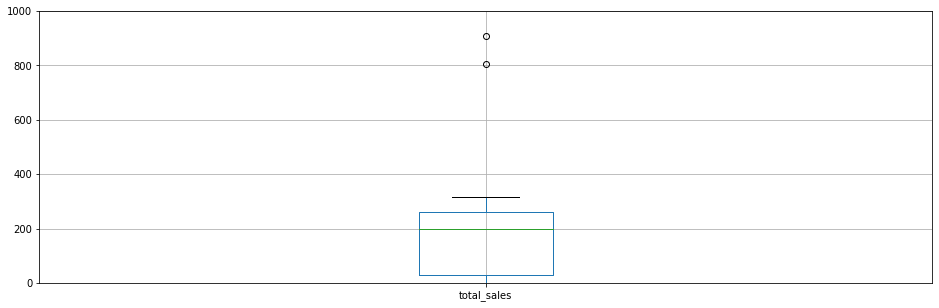

In [41]:
dff_games.query('release >= 2011')['total_sales'].plot(kind = 'box', figsize = (16, 5), ylim = (0, 1000), grid = True);

In [42]:
dff_games['total_sales'].median()

159.32

#### По общим продажам игр, медиана равна всего 160, но видны выбивающиеся значения - это и есть наши фавориты с предыдущего графика

In [43]:
dff_actual = dff.groupby(['platform', 'release']).count().reset_index()

In [44]:
dff_actual

,platform,release,name,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb,total_sales
0,2600,1980.0,9,9,9,9,9,9,9,9,9,9
1,2600,1981.0,46,46,46,46,46,46,46,46,46,46
2,2600,1982.0,36,36,36,36,36,36,36,36,36,36
3,2600,1983.0,11,11,11,11,11,11,11,11,11,11
4,2600,1984.0,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
215,XBOX,2016.0,13,13,13,13,13,13,13,13,13,13
216,XOne,2013.0,19,19,19,19,19,19,19,19,19,19
217,XOne,2014.0,61,61,61,61,61,61,61,61,61,61
218,XOne,2015.0,80,80,80,80,80,80,80,80,80,80


In [45]:
x1 = dff_actual.query('platform == "PS" and release >= 2011')['total_sales']
x2 = dff_actual.query('platform == "XBOX" and release >= 2011')['total_sales']
x3 = dff_actual.query('platform == "PC" and release >= 2011')['total_sales']

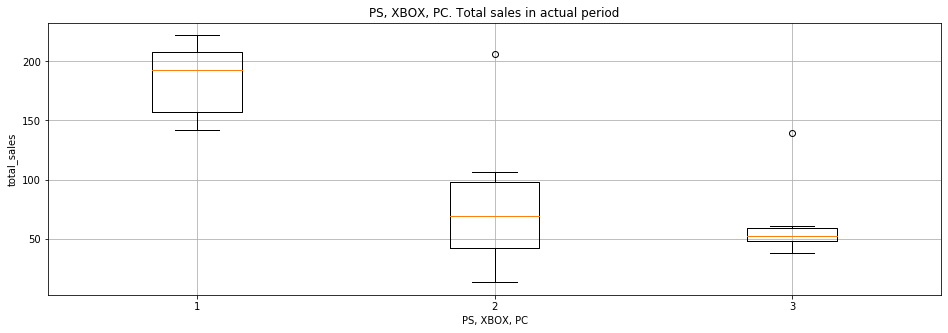

In [46]:
plt.figure(figsize = (16, 5))
plt.title('PS, XBOX, PC. Total sales in actual period')
plt.grid()
plt.ylabel('total_sales')
plt.xlabel('PS, XBOX, PC')
plt.boxplot([x1, x2, x3]);

### Рассмотрим, как на продажи игр влияют оценки критиков, на примере трех самых популярных платформ

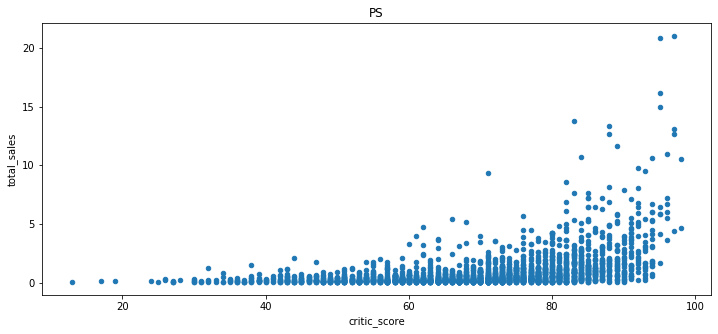

In [47]:
dff_ps = dff.query('platform == "PS" and critic_score >= 0')
dff_ps.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', figsize = (12, 5), title = 'PS');

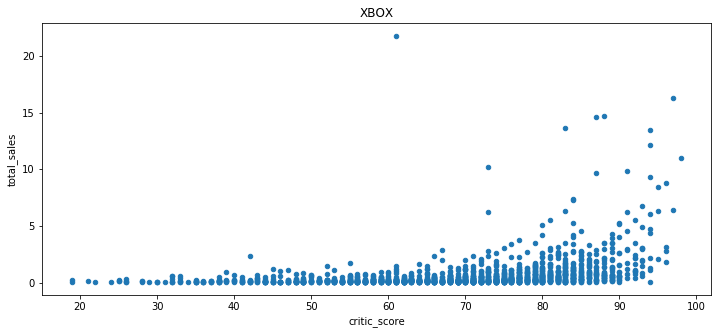

In [48]:
dff_xbox = dff.query('platform == "XBOX" and critic_score >= 0')
dff_xbox.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', figsize = (12, 5), title = 'XBOX');

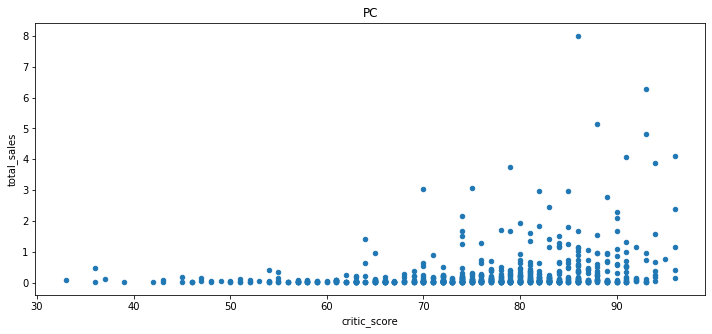

In [49]:
dff_pc = dff.query('platform == "PC" and critic_score >= 0')
dff_pc.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', figsize = (12, 5), title = 'PC');

#### В целом все довольно логично - чем выше оценки, тем больше подажи, разумеется не без исключений

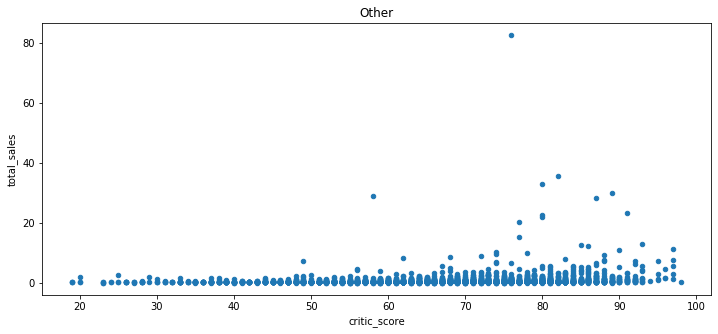

In [50]:
dff_other = dff.query('platform not in @popular_platforms and critic_score >= 0')
dff_other.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', figsize = (12, 5), title = 'Other');

#### А это такой же график, но для всех остальных платформ. Тут картина немного иная, хотя в целом конечно видно что чем лучше рейтинг, тем больше продаж, но выражено это не так явно. Думаю это зависит от многих факторов, например - игры на непопулярные платформы куда меньше обозревают, и оценок критиков меньше, а потому куда выше шанс несправедливой оценки

#### Составим графики корреляции, посмотрим как влияют отзывы критиков и пользователей на продажи

In [51]:
dff_ps_final = dff_ps[['total_sales', 'critic_score', 'user_score']]
dff_xbox_final = dff_xbox[['total_sales', 'critic_score', 'user_score']]
dff_pc_final = dff_pc[['total_sales', 'critic_score', 'user_score']]

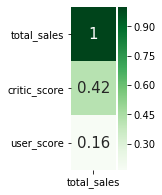

In [52]:
plt.figure(figsize=(1,3))
sns.heatmap(dff_ps_final.corr()[['total_sales']].sort_values(by = 'total_sales', ascending = False), cmap = "Greens", 
            annot = True, annot_kws = {'size':15});

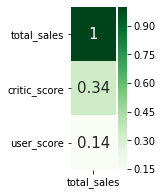

In [53]:
plt.figure(figsize=(1,3))
sns.heatmap(dff_xbox_final.corr()[['total_sales']].sort_values(by = 'total_sales', ascending = False), cmap = "Greens", 
            annot = True, annot_kws = {'size':15});

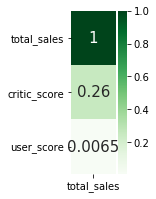

In [54]:
plt.figure(figsize=(1,3))
sns.heatmap(dff_pc_final.corr()[['total_sales']].sort_values(by = 'total_sales', ascending = False), cmap = "Greens", 
            annot = True, annot_kws = {'size':15});

#### Итого, можно сказать что в целом продажи игр слабо зависимы от оценок критиков, а от оценок пользователей - и того меньше

#### Далее рассмотрим, как на продажи влияет жанр игры

In [55]:
dff_genre = dff.groupby('genre').count().reset_index()

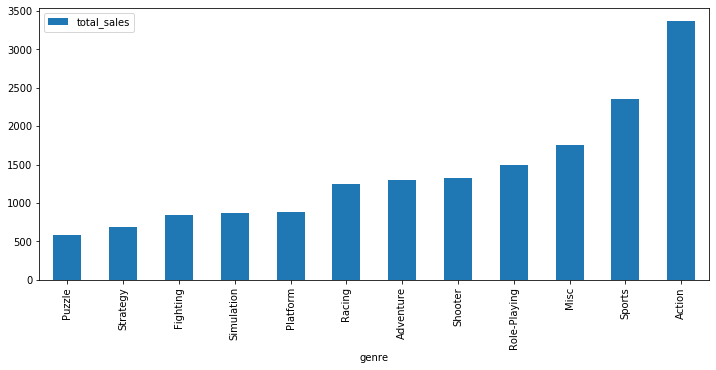

In [56]:
dff_genre.sort_values('total_sales').plot(kind = 'bar', x = 'genre', y = 'total_sales', figsize = (12, 5));

#### Определенно, жанр влияет. Было очевидно, что популярнее всего сейчас жанр action. Ну и что скрывать, те жанры где надо подумать на последних местах

<div class="alert alert-block alert-success">
<h2>Комментарий от ревьювера (все здОрово)</h2> 

Очень хорошо, все верно)

#### Далее, оценим популярные платформы и жанры для каждого региона

In [57]:
dff_eu = dff.groupby('platform')['eu_sales'].sum().reset_index()
dff_na = dff.groupby('platform')['na_sales'].sum().reset_index()
dff_jp = dff.groupby('platform')['jp_sales'].sum().reset_index()

In [58]:
dff_eu.sort_values('eu_sales', ascending = False).head(5)

,platform,eu_sales
15,PS,1024.28
25,XBOX,331.71
23,Wii,262.21
4,DS,188.89
13,PC,142.44


In [59]:
dff_na.sort_values('na_sales', ascending = False).head(5)

,platform,na_sales
15,PS,1422.59
25,XBOX,789.16
23,Wii,496.90
4,DS,382.40
6,GBA,187.54


In [60]:
dff_jp.sort_values('jp_sales', ascending = False).head(5)

,platform,jp_sales
15,PS,375.17
4,DS,175.57
20,SNES,116.55
2,3DS,100.67
11,NES,98.65


In [61]:
dff_eu_platforms = ['PS', 'XBOX', 'Wii', 'DS', 'PC']
dff_na_platforms = ['PS', 'XBOX', 'Wii', 'DS', 'GBA']
dff_jp_platforms = ['PS', 'DS', 'SNES', '3DS', 'NES']

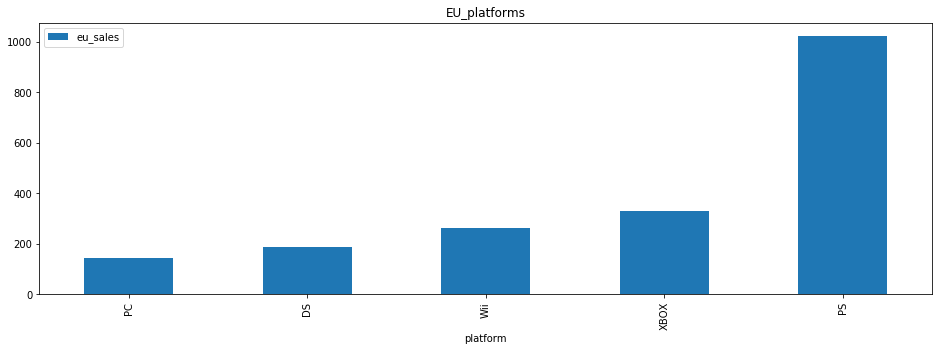

In [62]:
dff_eu.query('platform in @dff_eu_platforms').sort_values('eu_sales').plot(kind = 'bar',
                                                x = 'platform', y = 'eu_sales', figsize = (16, 5), title = 'EU_platforms');

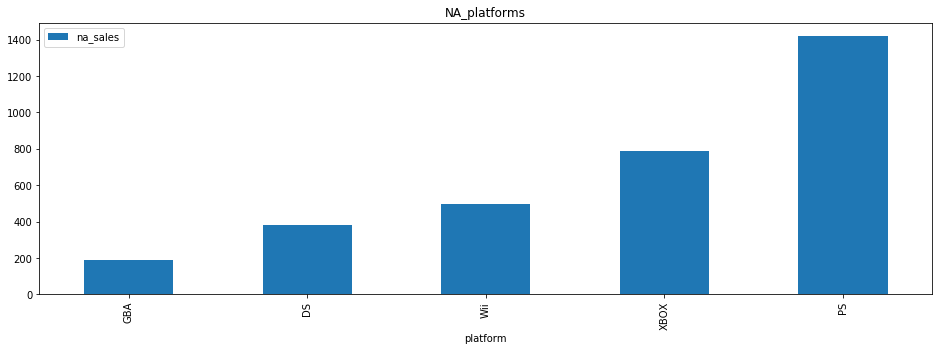

In [63]:
dff_na.query('platform in @dff_na_platforms').sort_values('na_sales').plot(kind = 'bar',
                                                x = 'platform', y = 'na_sales', figsize = (16, 5), title = 'NA_platforms');

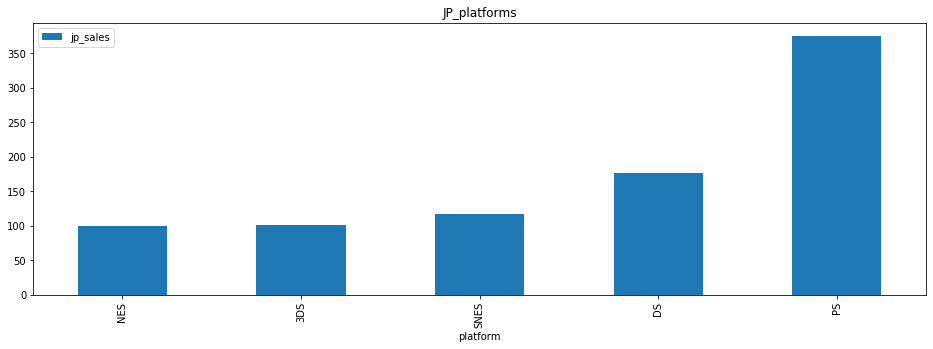

In [64]:
dff_jp.query('platform in @dff_jp_platforms').sort_values('jp_sales').plot(kind = 'bar',
                                                x = 'platform', y = 'jp_sales', figsize = (16, 5), title = 'JP_platforms');

#### В Европе все очевидно - с большим отрывом лидирует PS, у остальных платформ примерно одинаковая популярность. В Америке так же лидирует PS, однако у других платформ отрыв гораздо меньше, а PC и вовсе не входит в топ-5. В Японии топ так же обошелся без PC, а лидер все так же PS. На второе место впервые варвался DS. В целом, в Японии все немного по-другому, например в топ-5 вошли такие платформы как NES, SNES и 3DS, полагаю тому есть всего одна причина, то что Япония - родина Nintendo.

In [65]:
df5 = dff.query('release >= 2011')

In [66]:
def actual_plot(group, region_sales, ax):
    pt = df5.groupby(group).agg({region_sales: 'sum'}).sort_values(by = region_sales, ascending = False)[:5]
    titles = {'na_sales': 'NA Sales', 'eu_sales': 'EU Sales', 'jp_sales': 'JP Sales'}
    plot = pt.plot(kind = 'bar', ec = 'black', title = titles[region_sales], ax = axes[ax], 
                   fontsize = 18)
    plot.legend(prop = {'size':14})
    plot.set_xlabel('')
    plot.title.set_size(15)

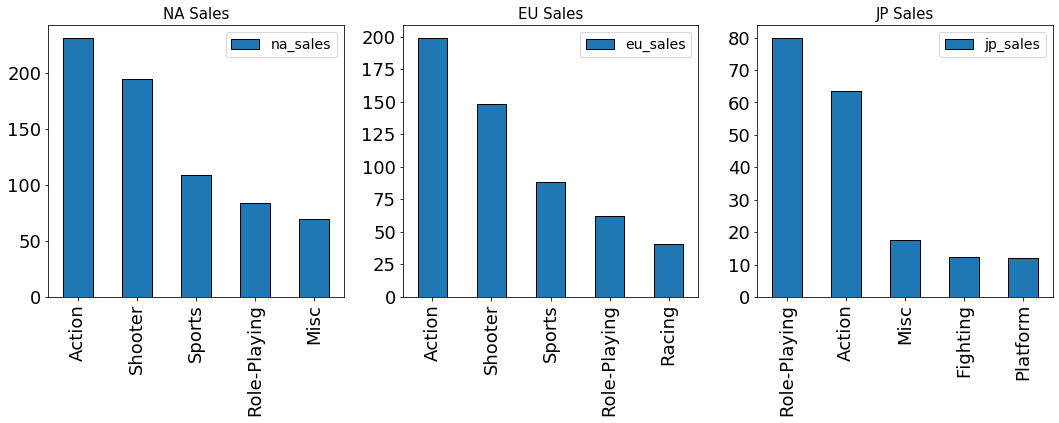

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

actual_plot('genre', 'na_sales', 0)
actual_plot('genre', 'eu_sales', 1)
actual_plot('genre', 'jp_sales', 2)

<div class = "alert alert-info">
              <b>
              И снова рынок Японии отличается - лидирует не Action, а Role-playing, но на втором месте все же Action. Америка и Европа же очень похожи, не только по топу жанров, но даже по их распределению
    </b>
    </div>

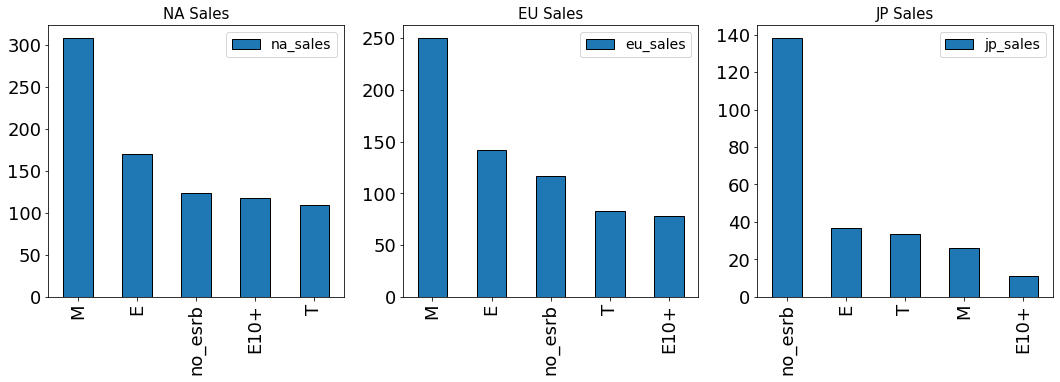

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

actual_plot('esrb', 'na_sales', 0)
actual_plot('esrb', 'eu_sales', 1)
actual_plot('esrb', 'jp_sales', 2)

### Проверка гипотез

#### Первая нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Посмотрим на дисперсии выборок

In [69]:
print('Дисперсия выборки по XBOX - ', df5.query('platform == "XBOX" and user_score >= 0')['user_score'].var())
print('Дисперсия выборки по PC - ', df5.query('platform == "PC" and user_score >= 0')['user_score'].var())

Дисперсия выборки по XBOX -  2.4466299609481426
Дисперсия выборки по PC -  2.5962957995358837


Дисперсии почти равны - можно использовать equal_var = True

In [70]:
xbox_user_score = df5.query('platform == "XBOX" and user_score >= 0')['user_score']
pc_user_score = df5.query('platform == "PC" and user_score >= 0')['user_score']

In [71]:
stat, p = ttest_ind(xbox_user_score, pc_user_score)
print(p)
print('alpha - 0.05')

0.3283822659693548
alpha - 0.05


Опровергнуть теорию нельзя

#### Вторая нулевая гипотеза - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Примем за нулевую гипотезу обратное - что они одинаковы

Посмотрим на дисперсии выборок

In [72]:
print('Дисперсия выборки по Action - ', df5.query('genre == "Action" and user_score >= 0')['user_score'].var())
print('Дисперсия выборки по Sports - ', df5.query('genre == "Sports" and user_score >= 0')['user_score'].var())

Дисперсия выборки по Action -  1.8118770103036579
Дисперсия выборки по Sports -  2.8825095404015264


Дисперсии сильно отличаются, будем использовать equal_var = False

In [73]:
action_user_score = df5.query('genre == "Action" and user_score >= 0')['user_score']
sports_user_score = df5.query('genre == "Sports" and user_score >= 0')['user_score']

In [74]:
stat, p = ttest_ind(action_user_score, sports_user_score, equal_var = False)
print(p)
print('alpha - 0.05')

8.285648549432565e-19
alpha - 0.05


Опровергнуть теорию нельзя

### Общий вывод:

1. На продажи игр несильно влияют оценки критиков, и почти никак - оценки игроков
2. Последние несколько лет рынок игр на ПК и приставках переживает упадок. Полагаю это свяазно с массовым переходом на мобильный рынок
3. На деле, на рынке игр для ПК и приставок сейчас только 3 серьезные компании. Хотя, как показала информация по Японии, там все по-другому из-за Нинтендо
4. Самый популярный жанр - Action. Жанры же стратегий и головоломок мало кого интересуют и представляют собой скорее нишевый продукт